# News Mood

#### The below script perform a sentiment analysis of the Twitter activities of various news outlets.
In this script, a visualizaed summary is presented to show the sentiments expressed in Tweets by BBC, CBS, CNN, Fox, and New York times.

In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt


# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Target Account
target_users = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes")

# List to hold sentiments
sentiments = []

# Loop through all target users
for user in target_users:
    
    counter = 1

    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

        public_tweets = api.user_timeline(user, page = x)

        for tweet in public_tweets:

                # Run Vader Analysis on each tweet
                results = analyzer.polarity_scores(tweet["text"])
                compound = results["compound"]
                pos = results["pos"]
                neu = results["neu"]
                neg = results["neg"]

                sentiments.append({"User" : str(user).replace("@", ""),
                           "Date": tweet["created_at"],
                           "Compound" : compound,
                           "Positive" : pos,
                           "Negative" : neg,
                           "Neutral" : neu,
                           "Tweets Ago" : counter,
                           "Text": tweet["text"]})
                
                counter +=1

In [3]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Text,Tweets Ago,User
0,-0.5707,Mon Jun 04 19:03:02 +0000 2018,0.178,0.822,0.0,"Versailles is back! Tonight, Madame de Montesp...",1,BBC
1,-0.4767,Mon Jun 04 18:31:05 +0000 2018,0.171,0.829,0.0,The story of a group of working-class women co...,2,BBC
2,-0.5859,Mon Jun 04 18:02:05 +0000 2018,0.231,0.769,0.0,The moment a dancing off-duty FBI agent drops ...,3,BBC
3,0.0000,Mon Jun 04 17:01:13 +0000 2018,0.000,1.000,0.0,📸 From #Manhattanhenge to the world's largest ...,4,BBC
4,0.0000,Mon Jun 04 16:01:04 +0000 2018,0.000,1.000,0.0,🤷‍♀️😂 When @CubaGoodingJr took over @BBCBreakf...,5,BBC


In [4]:
# Export data in dataframe into a csv file
sentiments_pd.to_csv("News_Mood.csv", index=False)

## Tweet Sentiment Scatter Plot

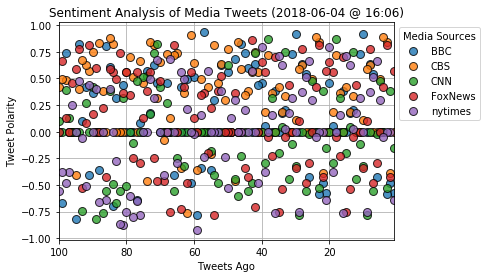

In [5]:
#Build Scatter plot
sentiments_pivot = sentiments_pd.pivot(index="Tweets Ago", values="Compound", columns="User")
sentiments_pivot.plot(marker="o", style= " ", markeredgecolor="black", alpha=0.8, grid = True, ms = 8)

plt.legend(title="Media Sources", bbox_to_anchor=(1, 1))

# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d @ %H:%M")
plt.title(f"Sentiment Analysis of Media Tweets ({now})")


plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")

plt.xlim([sentiments_pd["Tweets Ago"].max(),sentiments_pd["Tweets Ago"].min()]) 

plt.savefig("Sentiment Analysis of Media Tweets")

plt.show()

#### Findings: 
- Tweet sentiment of the media organizations analysed are mostly neutral. 
- Positive tweets are more than negative tweets.
- The latest 100 tweets of CBS tend to be more postive.

# Overall Sentiment Bar Chart

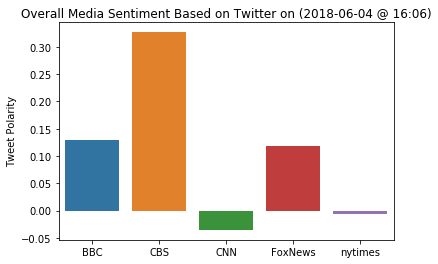

In [6]:
# Use Seaborn to generate bar chart
sentiment_bar = sns.barplot(x="User", y="Compound", data = sentiments_pd, ci=None)

now = datetime.now()
now = now.strftime("%Y-%m-%d @ %H:%M")
plt.title(f"Overall Media Sentiment Based on Twitter on ({now})")

plt.ylabel("Tweet Polarity")
plt.xlabel("")


plt.savefig("Tweeter Media Sentiment")
plt.show()

#### Findings: 
- Among the five media organizations analysed, CBS tweets overall is the most positive.
- New York Times Tweets are the most Neutral
- While CNN tweets are relatively negative, all five medias are generally in neutral tone.